# Email Analysis
# Find top 5 Agents by Average Query Revert
# Present Percentage of All Types of Request
# Present Claim Type of Quesries for Each Day of week

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import pandas.plotting 
import matplotlib
import matplotlib.pyplot as pp
from matplotlib.pyplot import hist
from IPython import display


In [2]:
df = pd.read_csv('Assignment.csv', encoding = 'latin1')

In [3]:
df.columns.values

array(['Case Number', 'Created By', 'Type', 'Sub Type', 'Policy',
       'Case Origin', 'Status', 'Complaint type', 'Case Owner',
       'Parent Case Date/Time Opened', 'Date/Time Closed', 'Opened Date',
       'Subject', 'Date/Time Opened', 'Open', 'Closed'], dtype=object)

In [10]:
# Endure columns are in proper date time type
df['Date/Time Closed'] = pd.to_datetime(df['Date/Time Closed'])
df['Date/Time Opened'] = pd.to_datetime(df['Date/Time Opened'])

In [19]:
# get age in 
df['Age (Hours)']=(df['Date/Time Closed']-df['Date/Time Opened']).astype('timedelta64[h]')
df['Age (Hours)'].head()

0    28.0
1    16.0
2     4.0
3    24.0
4    46.0
Name: Age (Hours), dtype: float64

In [20]:
df_mean = df.groupby(['Case Owner'])['Age (Hours)'].mean().reset_index()
df_mean.nlargest(5, 'Age (Hours)')

,Case Owner,Age (Hours)
33,gayatri sasane,64.5
0,Ahmedabad Operations,61.0
10,MumbaiVashi Operations,47.0
3,Baroda Operations,44.0
9,MumbaiThane Operations,37.0


# Above is the list of top 5 users taken max average time for reverting quries

# Below is the percentage of All Types of Custgomer quries

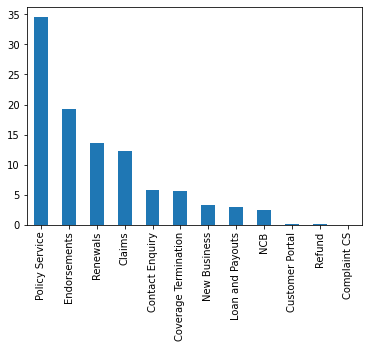

In [16]:
counts = df.Type.value_counts(normalize=True).mul(100).round(1).
counts.plot(kind='bar')

In [8]:
df['DayName']= df['Date/Time Opened'].dt.day_name()

# Below is the Day wise count of Claims Type of Email quries

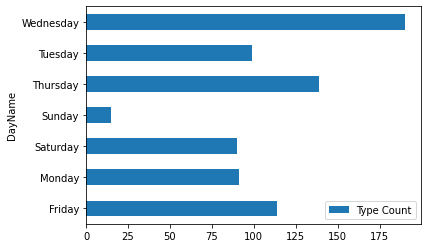

In [22]:
# df.groupby(['Type','DayName'])['Date/Time Opened'].count().reset_index().plot(kind='density)
pos_df = df.loc[(df['Type']=='Policy Service')].groupby(['Type','DayName']).agg({'Type':'count'}).rename(columns={'Type':'Type Count'}).reset_index()
pos_df.plot.barh(y='Type Count', x='DayName')
